In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Bhawna\Downloads\bank_transactions.csv", index_col='TransactionID')
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
TransactionID,,,,,,,,
T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5
...,...,...,...,...,...,...,...,...
T19996,C2130963,09-08-1989,M,MUMBAI,9961.78,23-09-2016,115919,47.0
T19997,C1214583,02-01-1987,M,KOLKATA,7120.57,23-09-2016,115831,300.0
T19998,C4739783,11-02-1970,M,MUMBAI,118130.78,23-09-2016,193238,3400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, T1 to T20000
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               20000 non-null  object 
 1   CustomerDOB              19928 non-null  object 
 2   CustGender               19989 non-null  object 
 3   CustLocation             19999 non-null  object 
 4   CustAccountBalance       19973 non-null  float64
 5   TransactionDate          20000 non-null  object 
 6   TransactionTime          20000 non-null  int64  
 7   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
df.dropna(inplace=True)

In [9]:
numeric_features = df[['CustAccountBalance','TransactionAmount (INR)']]

In [10]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(numeric_features)

## EDA

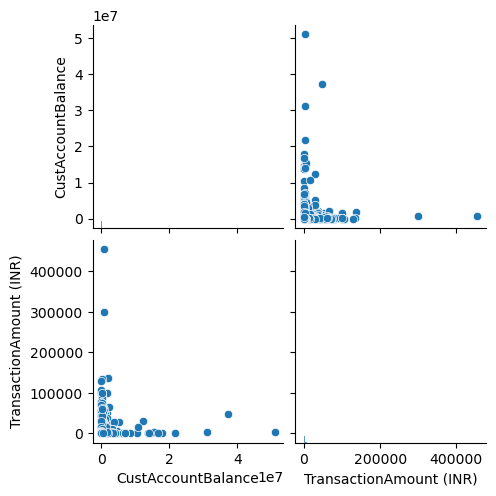

In [11]:
sns.pairplot(df[['CustAccountBalance','TransactionAmount (INR)']])
plt.show()

  File "C:\Users\Bhawna\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Bhawna\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhawna\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhawna\anaconda3\Lib\subproc

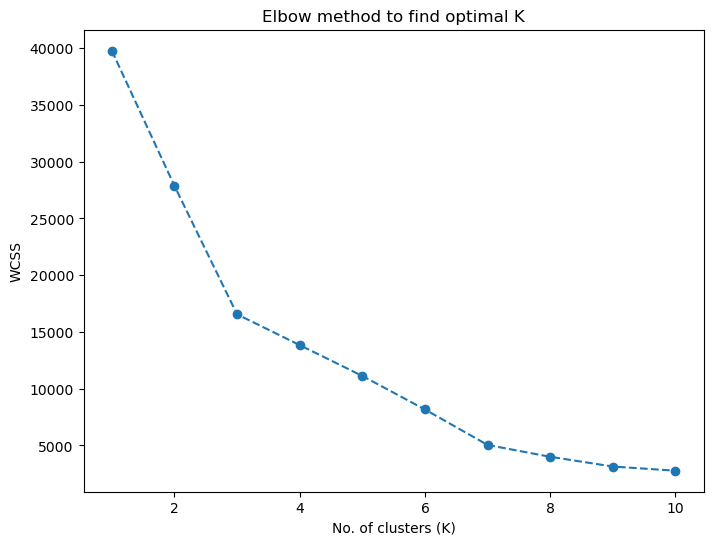

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('No. of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow method to find optimal K')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

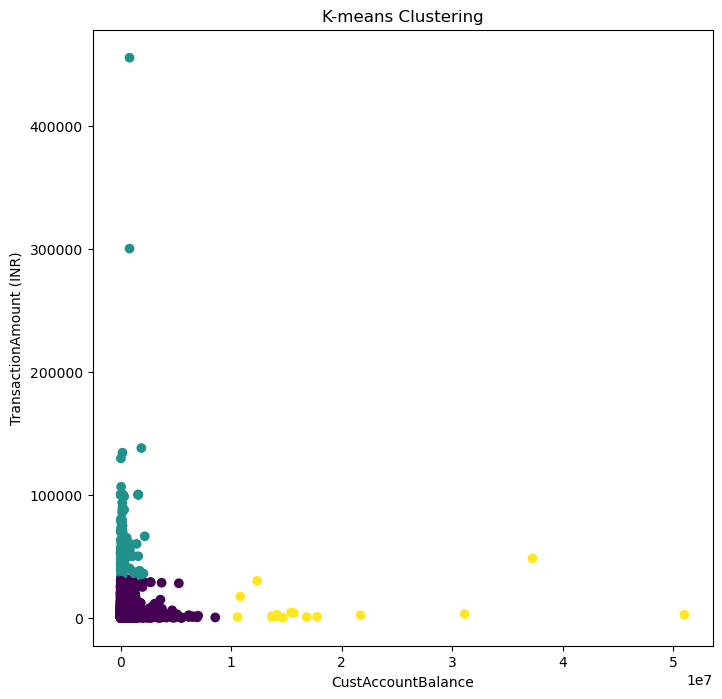

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(df['CustAccountBalance'], df['TransactionAmount (INR)'], c = df['cluster'])
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('K-means Clustering')
plt.show()